# Septima Actividad: Data Wrangling (Limpieza datos): 

- **Data source**: [Cantidad de ambulancias, camas y salas (consideradas trazadoras) por departamento, año y naturaleza jurídica para servicios habilitados](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Cantidad-de-ambulancias-camas-y-salas-consideradas/fa2g-cdft/about_data)

- **Introducción**: En este análisis, se llevará a cabo un proceso de limpieza de datos con el fin de mejorar su calidad y reducir el ruido que pueda afectar los modelos o análisis posteriores. El primer paso consistirá en la identificación y manejo de valores nulos, donde se evaluará si es posible aplicar técnicas de imputación simples o múltiples para completar los datos faltantes. A continuación, se abordarán los outliers, implementando estrategias de identificación mediante métodos tradicionales como el rango intercuartil (IQR) o Z-score, así como técnicas avanzadas de machine learning como Isolation Forest, Local Outlier Factor (LoF) o Support Vector Machines (SVM) en su variante One-Class. Con estos procedimientos, se busca garantizar que el conjunto de datos esté libre de inconsistencias que puedan comprometer la validez de los análisis.

- **Objetivo principal**: El objetivo de este proyecto es realizar una limpieza exhaustiva del conjunto de datos, abordando problemas comunes como outliers, duplicados y valores nulos. Esto garantizará que los datos sean de alta calidad y adecuados para análisis posteriores, utilizando tanto métodos tradicionales como avanzados de aprendizaje de máquina.

- **Palabras clave**: 
Disparidad médica, distribución de recursos, infraestructura médica, salas de quirófano, Salas de parto, cuidados intensivos, departamentos desatendidos, emergencias médicas, capacidad hospitalaria, acceso a la salud, riesgo crítico, reducción de, instalaciones, vulnerabilidad regional, Registro de datos médicos, intervención urgente, recursos médicos, desigualdad sanitaria, atención médica esencial, equilibrio de recursos y Colombia salud pública.

# 0. Librerias

In [1]:
import pandas as pd
import matplotlib as mtl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
import folium 
from folium.features import GeoJsonTooltip
import branca
from sklearn.ensemble import IsolationForest

# 1. Extracción de datos

In [15]:
import os
import pandas as pd

# Define the path to the CSV file
ruta = r'C:\Users\USER\OneDrive\Escritorio\ActividadesBIT\Actividad_3_Y_4'
csv_file_path = os.path.join(
    ruta,
    'Cantidad_de_ambulancias__camas_y_salas__consideradas_trazadoras__por_departamento__a_o_y_naturaleza_jur_dica_para_servicios_habilitados_20240805.csv'
)

# Read the CSV file
df = pd.read_csv(
    csv_file_path,
    sep=',',
    encoding='utf-8'
)

# Display the DataFrame
df


,Departamento,Año,Naturaleza jurídica,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Adultos,CAMAS Cuidado Agudo Mental,CAMAS Cuidado Intensivo Adulto,CAMAS Cuidado Intensivo Neonatal,CAMAS Cuidado Intensivo Pediátrico,...,CAMAS Cuidado Intermedio Neonatal,CAMAS Cuidado Intermedio Pediátrico,CAMAS Farmacodependencia,CAMAS Obstetricia,CAMAS Pediátrica,CAMAS Psiquiatría,CAMAS Unidad de Quemados Adulto,CAMAS Unidad de Quemados Pediátrico,SALAS Partos,SALAS Quirófano
0,Amazonas,2017.0,Privada,0,0,41,0,0,0,0,...,0,0,0,2,7,0,0,0,0,1
1,Amazonas,2017.0,Pública,3,0,27,0,0,0,0,...,0,3,0,21,28,0,0,0,4,2
2,Amazonas,2018.0,Privada,0,0,41,0,0,0,0,...,0,0,30,2,7,0,0,0,0,1
3,Amazonas,2018.0,Pública,3,0,27,0,0,0,0,...,0,3,0,21,28,0,0,0,8,2
4,Amazonas,2019.0,Privada,0,0,41,0,0,0,0,...,0,0,30,2,7,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Valle del cauca,2022.0,Pública,133,9,491,0,45,0,0,...,0,0,0,0,168,0,0,0,44,0
374,Vaupés,2022.0,Privada,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,Vaupés,2022.0,Pública,2,0,14,0,0,0,0,...,0,0,0,1,8,0,0,0,3,0
376,Vichada,2022.0,Privada,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 2. Data Wrangling

In [3]:
# Variables categoricas y numericas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departamento                         378 non-null    object 
 1   Año                                  377 non-null    float64
 2   Naturaleza jurídica                  377 non-null    object 
 3   AMBULANCIAS Básica                   378 non-null    int64  
 4   AMBULANCIAS Medicalizada             378 non-null    int64  
 5   CAMAS Adultos                        378 non-null    int64  
 6   CAMAS Cuidado Agudo Mental           378 non-null    int64  
 7   CAMAS Cuidado Intensivo Adulto       378 non-null    int64  
 8   CAMAS Cuidado Intensivo Neonatal     378 non-null    int64  
 9   CAMAS Cuidado Intensivo Pediátrico   378 non-null    int64  
 10  CAMAS Cuidado Intermedio Adulto      378 non-null    int64  
 11  CAMAS Cuidado Intermedio Mental 

Se revisó la estructura del dataframe y nos dimos cuenta que contamos únicamente con un dato nulo.

# 2.1 Valores nulos o datos faltantes

In [4]:
df.isnull().sum()

Departamento                           0
Año                                    1
Naturaleza jurídica                    1
AMBULANCIAS Básica                     0
AMBULANCIAS Medicalizada               0
CAMAS Adultos                          0
CAMAS Cuidado Agudo Mental             0
CAMAS Cuidado Intensivo Adulto         0
CAMAS Cuidado Intensivo Neonatal       0
CAMAS Cuidado Intensivo Pediátrico     0
CAMAS Cuidado Intermedio Adulto        0
CAMAS Cuidado Intermedio Mental        0
CAMAS Cuidado Intermedio Neonatal      0
CAMAS Cuidado Intermedio Pediátrico    0
CAMAS Farmacodependencia               0
CAMAS Obstetricia                      0
CAMAS Pediátrica                       0
CAMAS Psiquiatría                      0
CAMAS Unidad de Quemados Adulto        0
CAMAS Unidad de Quemados Pediátrico    0
SALAS Partos                           0
SALAS Quirófano                        0
dtype: int64

In [5]:
#A continuación eliminamos el dato nulo.
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 377
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Departamento                         377 non-null    object 
 1   Año                                  377 non-null    float64
 2   Naturaleza jurídica                  377 non-null    object 
 3   AMBULANCIAS Básica                   377 non-null    int64  
 4   AMBULANCIAS Medicalizada             377 non-null    int64  
 5   CAMAS Adultos                        377 non-null    int64  
 6   CAMAS Cuidado Agudo Mental           377 non-null    int64  
 7   CAMAS Cuidado Intensivo Adulto       377 non-null    int64  
 8   CAMAS Cuidado Intensivo Neonatal     377 non-null    int64  
 9   CAMAS Cuidado Intensivo Pediátrico   377 non-null    int64  
 10  CAMAS Cuidado Intermedio Adulto      377 non-null    int64  
 11  CAMAS Cuidado Intermedio Mental      

# 2.2 Columnas irrelevantes


In [16]:
#Vamos a eliminar las variables que se pueden sumar para obtener una variable total.
# Cambiar el tipo de datos a float para las columnas seleccionadas
df[['CAMAS Unidad de Quemados Adulto', 'CAMAS Adultos', 'CAMAS Cuidado Intensivo Adulto', 'CAMAS Cuidado Intermedio Adulto']] = df[['CAMAS Unidad de Quemados Adulto', 'CAMAS Adultos', 'CAMAS Cuidado Intensivo Adulto', 'CAMAS Cuidado Intermedio Adulto']].astype(float)
# Sumar los valores de las columnas seleccionadas
df['Camas Adultos'] = df[['CAMAS Adultos', 'CAMAS Cuidado Intensivo Adulto', 'CAMAS Unidad de Quemados Adulto', 'CAMAS Cuidado Intermedio Adulto']].sum(axis=1)
# Eliminar las columnas individuales
df = df.drop(columns=['CAMAS Unidad de Quemados Adulto', 'CAMAS Adultos', 'CAMAS Cuidado Intensivo Adulto', 'CAMAS Cuidado Intermedio Adulto'])
# Mostrar el DataFrame resultante
df


,Departamento,Año,Naturaleza jurídica,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Cuidado Agudo Mental,CAMAS Cuidado Intensivo Neonatal,CAMAS Cuidado Intensivo Pediátrico,CAMAS Cuidado Intermedio Mental,CAMAS Cuidado Intermedio Neonatal,CAMAS Cuidado Intermedio Pediátrico,CAMAS Farmacodependencia,CAMAS Obstetricia,CAMAS Pediátrica,CAMAS Psiquiatría,CAMAS Unidad de Quemados Pediátrico,SALAS Partos,SALAS Quirófano,Camas Adultos
0,Amazonas,2017.0,Privada,0,0,0,0,0,0,0,0,0,2,7,0,0,0,1,45.0
1,Amazonas,2017.0,Pública,3,0,0,0,0,0,0,3,0,21,28,0,0,4,2,31.0
2,Amazonas,2018.0,Privada,0,0,0,0,0,0,0,0,30,2,7,0,0,0,1,45.0
3,Amazonas,2018.0,Pública,3,0,0,0,0,0,0,3,0,21,28,0,0,8,2,31.0
4,Amazonas,2019.0,Privada,0,0,0,0,0,0,0,0,30,2,7,0,0,1,1,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Valle del cauca,2022.0,Pública,133,9,0,0,0,0,0,0,0,0,168,0,0,44,0,543.0
374,Vaupés,2022.0,Privada,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
375,Vaupés,2022.0,Pública,2,0,0,0,0,0,0,0,0,1,8,0,0,3,0,14.0
376,Vichada,2022.0,Privada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [17]:
df['Camas Pediatricas'] = df[['CAMAS Pediátrica', 'CAMAS Cuidado Intensivo Pediátrico', 'CAMAS Cuidado Intermedio Pediátrico', 'CAMAS Unidad de Quemados Pediátrico']].sum(axis=1)
df = df.drop(columns=['CAMAS Pediátrica', 'CAMAS Cuidado Intensivo Pediátrico', 'CAMAS Cuidado Intermedio Pediátrico', 'CAMAS Unidad de Quemados Pediátrico'])
df

,Departamento,Año,Naturaleza jurídica,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Cuidado Agudo Mental,CAMAS Cuidado Intensivo Neonatal,CAMAS Cuidado Intermedio Mental,CAMAS Cuidado Intermedio Neonatal,CAMAS Farmacodependencia,CAMAS Obstetricia,CAMAS Psiquiatría,SALAS Partos,SALAS Quirófano,Camas Adultos,Camas Pediatricas
0,Amazonas,2017.0,Privada,0,0,0,0,0,0,0,2,0,0,1,45.0,7
1,Amazonas,2017.0,Pública,3,0,0,0,0,0,0,21,0,4,2,31.0,31
2,Amazonas,2018.0,Privada,0,0,0,0,0,0,30,2,0,0,1,45.0,7
3,Amazonas,2018.0,Pública,3,0,0,0,0,0,0,21,0,8,2,31.0,31
4,Amazonas,2019.0,Privada,0,0,0,0,0,0,30,2,0,1,1,45.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Valle del cauca,2022.0,Pública,133,9,0,0,0,0,0,0,0,44,0,543.0,168
374,Vaupés,2022.0,Privada,1,1,0,0,0,0,0,0,0,0,0,0.0,0
375,Vaupés,2022.0,Pública,2,0,0,0,0,0,0,1,0,3,0,14.0,8
376,Vichada,2022.0,Privada,0,0,0,0,0,0,0,0,0,0,0,0.0,0


In [18]:
df['Camas Neonatales'] = df[['CAMAS Cuidado Intensivo Neonatal', 'CAMAS Cuidado Intermedio Neonatal']].sum(axis=1)
df = df.drop(columns=['CAMAS Cuidado Intensivo Neonatal', 'CAMAS Cuidado Intermedio Neonatal'])
df

,Departamento,Año,Naturaleza jurídica,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Cuidado Agudo Mental,CAMAS Cuidado Intermedio Mental,CAMAS Farmacodependencia,CAMAS Obstetricia,CAMAS Psiquiatría,SALAS Partos,SALAS Quirófano,Camas Adultos,Camas Pediatricas,Camas Neonatales
0,Amazonas,2017.0,Privada,0,0,0,0,0,2,0,0,1,45.0,7,0
1,Amazonas,2017.0,Pública,3,0,0,0,0,21,0,4,2,31.0,31,0
2,Amazonas,2018.0,Privada,0,0,0,0,30,2,0,0,1,45.0,7,0
3,Amazonas,2018.0,Pública,3,0,0,0,0,21,0,8,2,31.0,31,0
4,Amazonas,2019.0,Privada,0,0,0,0,30,2,0,1,1,45.0,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Valle del cauca,2022.0,Pública,133,9,0,0,0,0,0,44,0,543.0,168,0
374,Vaupés,2022.0,Privada,1,1,0,0,0,0,0,0,0,0.0,0,0
375,Vaupés,2022.0,Pública,2,0,0,0,0,1,0,3,0,14.0,8,0
376,Vichada,2022.0,Privada,0,0,0,0,0,0,0,0,0,0.0,0,0


In [19]:
df['Camas Cuidado Mental'] = df[['CAMAS Cuidado Agudo Mental', 'CAMAS Cuidado Intermedio Mental', 'CAMAS Psiquiatría']].sum(axis=1)
df = df.drop(columns=['CAMAS Cuidado Agudo Mental', 'CAMAS Cuidado Intermedio Mental', 'CAMAS Psiquiatría'])
df

,Departamento,Año,Naturaleza jurídica,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Farmacodependencia,CAMAS Obstetricia,SALAS Partos,SALAS Quirófano,Camas Adultos,Camas Pediatricas,Camas Neonatales,Camas Cuidado Mental
0,Amazonas,2017.0,Privada,0,0,0,2,0,1,45.0,7,0,0
1,Amazonas,2017.0,Pública,3,0,0,21,4,2,31.0,31,0,0
2,Amazonas,2018.0,Privada,0,0,30,2,0,1,45.0,7,0,0
3,Amazonas,2018.0,Pública,3,0,0,21,8,2,31.0,31,0,0
4,Amazonas,2019.0,Privada,0,0,30,2,1,1,45.0,7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Valle del cauca,2022.0,Pública,133,9,0,0,44,0,543.0,168,0,0
374,Vaupés,2022.0,Privada,1,1,0,0,0,0,0.0,0,0,0
375,Vaupés,2022.0,Pública,2,0,0,1,3,0,14.0,8,0,0
376,Vichada,2022.0,Privada,0,0,0,0,0,0,0.0,0,0,0


In [20]:
df.dropna(inplace=True)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 377
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Departamento              377 non-null    object 
 1   Año                       377 non-null    float64
 2   Naturaleza jurídica       377 non-null    object 
 3   AMBULANCIAS Básica        377 non-null    int64  
 4   AMBULANCIAS Medicalizada  377 non-null    int64  
 5   CAMAS Farmacodependencia  377 non-null    int64  
 6   CAMAS Obstetricia         377 non-null    int64  
 7   SALAS Partos              377 non-null    int64  
 8   SALAS Quirófano           377 non-null    int64  
 9   Camas Adultos             377 non-null    float64
 10  Camas Pediatricas         377 non-null    int64  
 11  Camas Neonatales          377 non-null    int64  
 12  Camas Cuidado Mental      377 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 41.2+ KB


,Año,AMBULANCIAS Básica,AMBULANCIAS Medicalizada,CAMAS Farmacodependencia,CAMAS Obstetricia,SALAS Partos,SALAS Quirófano,Camas Adultos,Camas Pediatricas,Camas Neonatales,Camas Cuidado Mental
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,2019.363395,66.294430,17.795756,38.090186,79.175066,17.549072,33.177719,631.931034,144.655172,39.838196,71.408488
std,1.781416,81.820677,26.766687,101.055611,108.306456,22.423590,75.769511,988.872472,203.430233,81.411372,143.461566
min,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,6.000000,1.000000,0.000000,0.000000,2.000000,1.000000,73.000000,20.000000,0.000000,0.000000
50%,2019.000000,40.000000,8.000000,0.000000,34.000000,8.000000,10.000000,379.000000,83.000000,9.000000,0.000000
75%,2020.000000,90.000000,24.000000,30.000000,129.000000,28.000000,35.000000,685.000000,178.000000,37.000000,86.000000
max,2022.000000,500.000000,183.000000,910.000000,547.000000,134.000000,544.000000,6083.000000,1508.000000,527.000000,1121.000000


# 2.3 Filas repetidas

In [21]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño del set después de eliminar las filas repetidas: {df.shape}')

Tamaño del set antes de eliminar las filas repetidas: (377, 13)
Tamaño del set después de eliminar las filas repetidas: (377, 13)


# 2.4 Outliers en las variables numéricas

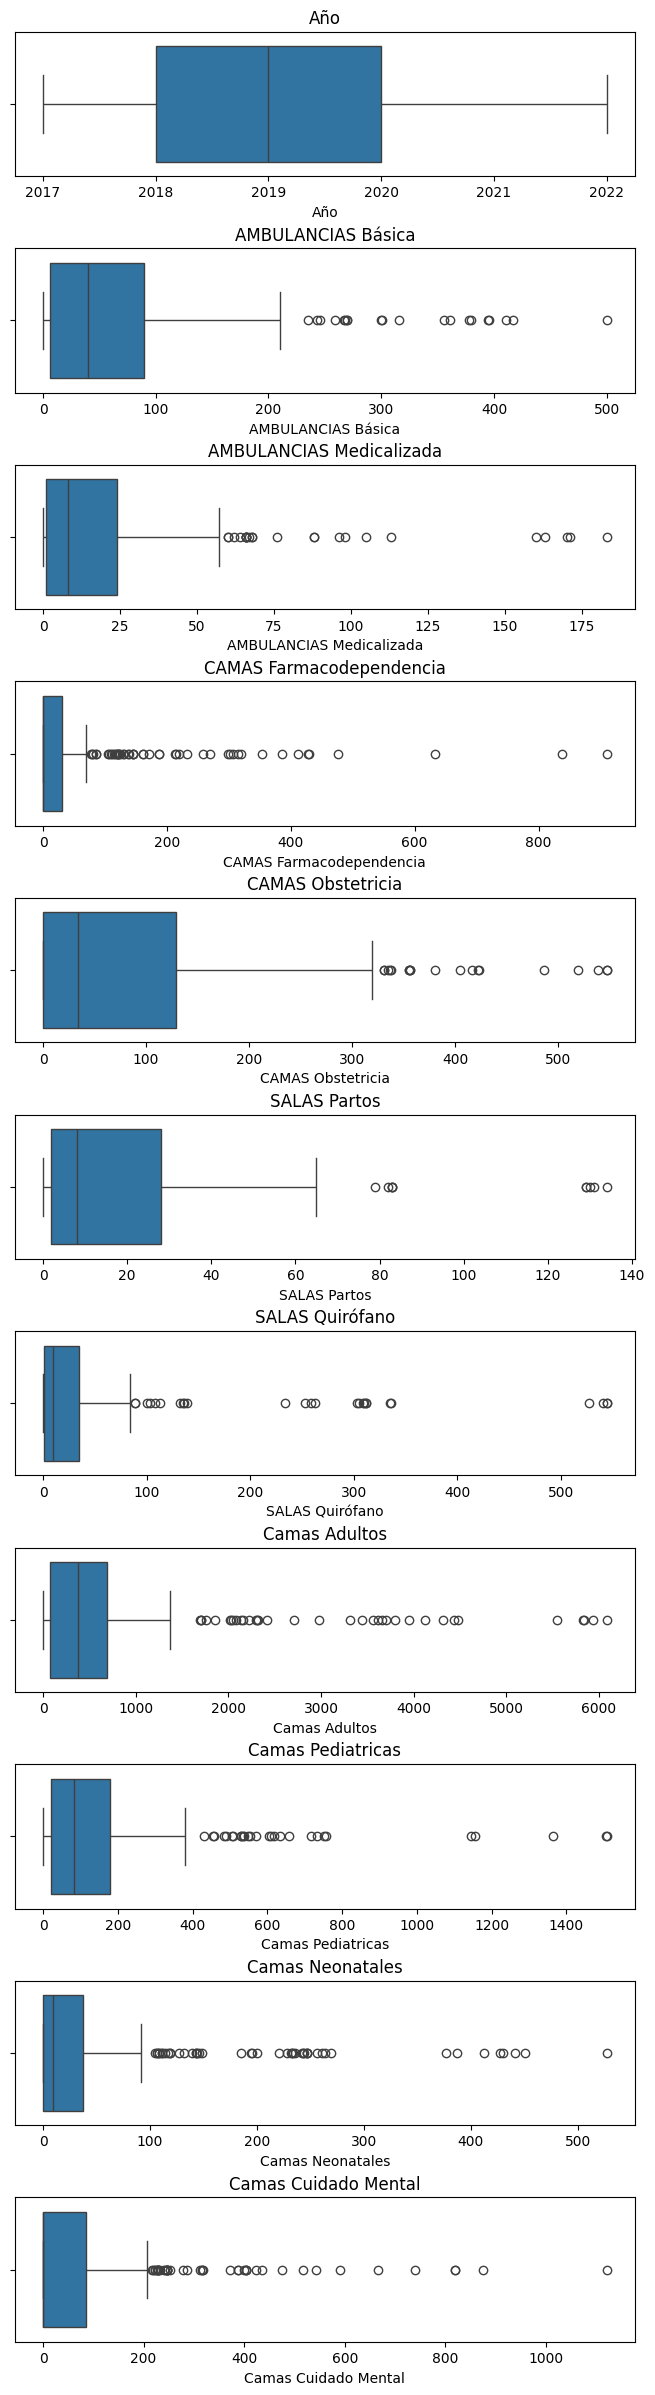

In [22]:
#Generar gráficas individuales pues las variables numéricas
#están en rangos diferentes
cols_num = ['Año', 'AMBULANCIAS Básica', 'AMBULANCIAS Medicalizada', 'CAMAS Farmacodependencia', 'CAMAS Obstetricia', 'SALAS Partos', 'SALAS Quirófano', 
            'Camas Adultos', 'Camas Pediatricas', 'Camas Neonatales', 'Camas Cuidado Mental']

fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

**Observaciones:**

Revisando la información no encontré datos que fueran irreales o que no tuvieran sentido, por lo que no vi la necesidad de eliminar algún tipo de dato o fila.

# 2.4.1. IQR (Rango Intercuartílico)

In [23]:
for columna in cols_num:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[columna] < (Q1 - 1.5 * IQR)) | (df[columna] > (Q3 + 1.5 * IQR))]
    
    print(f"Outliers en {columna}:")
    print(outliers)

Outliers en Año:
Empty DataFrame
Columns: [Departamento, Año, Naturaleza jurídica, AMBULANCIAS Básica, AMBULANCIAS Medicalizada, CAMAS Farmacodependencia, CAMAS Obstetricia, SALAS Partos, SALAS Quirófano, Camas Adultos, Camas Pediatricas, Camas Neonatales, Camas Cuidado Mental]
Index: []
Outliers en AMBULANCIAS Básica:
        Departamento     Año Naturaleza jurídica  AMBULANCIAS Básica  \
9          Antioquia  2017.0             Privada                 235   
10         Antioquia  2017.0             Pública                 268   
12         Antioquia  2018.0             Privada                 243   
13         Antioquia  2018.0             Pública                 270   
15         Antioquia  2019.0             Privada                 246   
16         Antioquia  2019.0             Pública                 267   
18         Antioquia  2020.0             Privada                 270   
19         Antioquia  2020.0             Pública                 300   
38        Bogotá D.C  2017.0   

# 2.4.2. Isolation Forest

In [26]:
# Configurar Isolation Forest con un 5% de contaminación (outliers)
iso = IsolationForest(contamination=0.05)

# Predecir si los datos son outliers o no
df['outlier'] = iso.fit_predict(df[cols_num])

# Filtrar los outliers
outliers = df[df['outlier'] == -1]  # -1 indica outlier

print("Outliers detectados:")
print(outliers)

Outliers detectados:
        Departamento     Año Naturaleza jurídica  AMBULANCIAS Básica  \
9          Antioquia  2017.0             Privada                 235   
10         Antioquia  2017.0             Pública                 268   
18         Antioquia  2020.0             Privada                 270   
19         Antioquia  2020.0             Pública                 300   
28         Atlántico  2017.0             Privada                 124   
30         Atlántico  2018.0             Privada                 135   
33         Atlántico  2019.0             Privada                 143   
36         Atlántico  2020.0             Privada                 116   
38        Bogotá D.C  2017.0             Privada                 361   
40        Bogotá D.C  2018.0             Privada                 395   
42        Bogotá D.C  2019.0             Privada                 378   
44        Bogotá D.C  2020.0             Privada                 396   
264  Valle del cauca  2017.0             Pr

**Observaciones:**

Las observaciones detectadas mediante el algoritmo de Isolation Forest revelan una serie de valores atípicos en diversas columnas del dataset, principalmente en la cantidad de ambulancias (básicas y medicalizadas) y camas hospitalarias en departamentos como Antioquia, Bogotá D.C. y Valle del Cauca, entre otros. Estos outliers sugieren que algunas regiones presentan un número significativamente mayor o menor de recursos en comparación con otras, lo que podría deberse a errores en la captura de datos, o bien a particularidades del contexto local, como el tamaño poblacional o la infraestructura hospitalaria. Además, la presencia de valores negativos o inusuales como `-1` en columnas de camas sugiere posibles problemas en la integridad del dataset, lo que requiere una revisión detallada para determinar si estos son errores que deben corregirse o si responden a situaciones excepcionales.
Como ya realizamos la revisión manual de primeras, podemos descartar que hayan outlaiers.

# 2.5. Errores tipográficos en variable categóricas

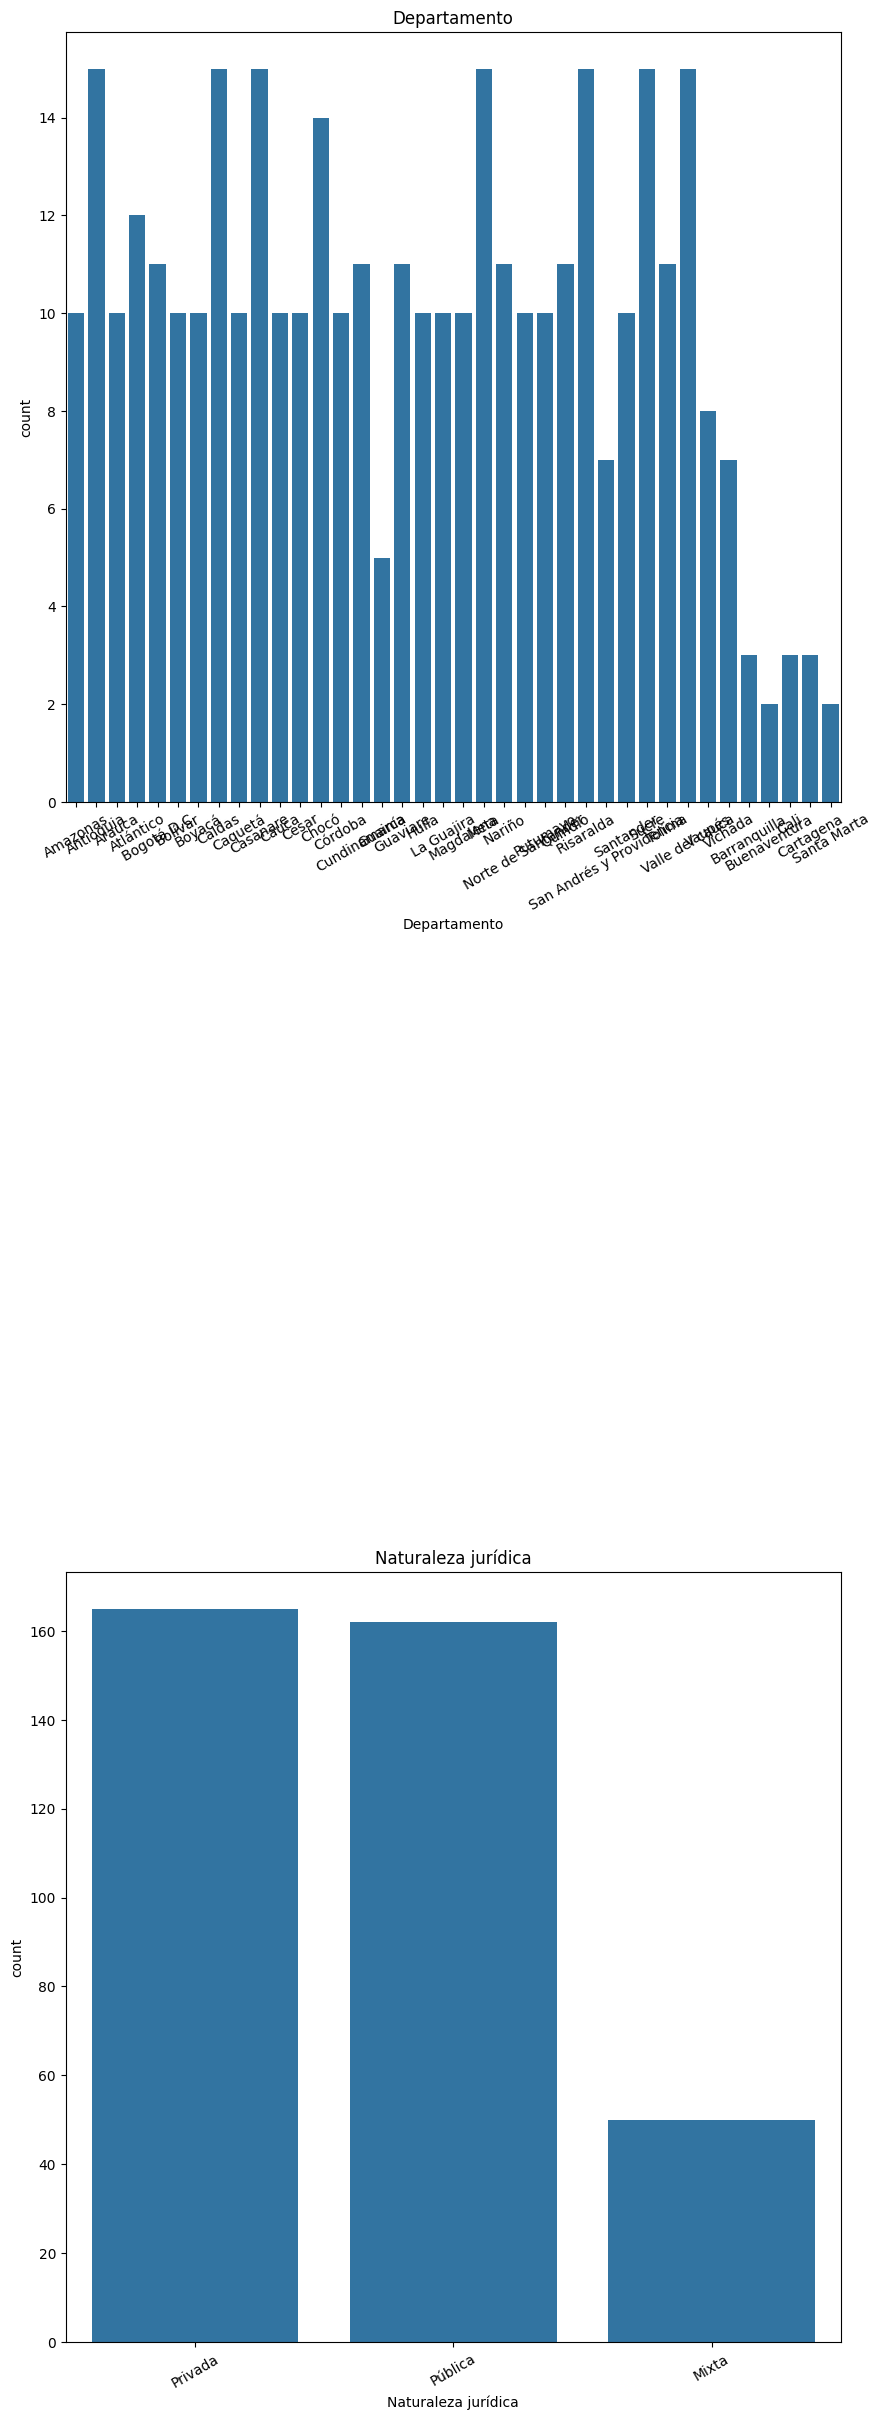

In [29]:
#Graficar los subniveles de cada variable categórica
cols_cat = ['Departamento', 'Naturaleza jurídica']

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=30)

**Observacion:**

Después de revisar esta información no se encontraron ningún tipo de error tipográfico o algo por el estilo.